In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        self._initialize_weights(X.shape[1])

    def fit(self, X, y):
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
            print(self.w_)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [3]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta   # learning rate
        self.n_iter = n_iter  # number of iteration
        self.random_state = random_state
        
        # weight initiailization
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
    def fit(self, X, y):
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            
            ####################################################
            # w = w + eta * (X.T dot errors)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()

            # compute cost 
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            ####################################################
            print(self.w_)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

In [4]:
seed_df = pd.read_csv("seeds.csv")
seed_df.columns = ["1","2","3","4","5","6","7","8"]

In [5]:
seed_df.head()

,1,2,3,4,5,6,7,8
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [6]:
seed_df["8"].unique()

array([1, 2, 3], dtype=int64)

In [7]:
X = seed_df.iloc[:,[0,1,2,3,4,5,6]]
Y = seed_df.iloc[:,[-1]]

In [8]:
Y = np.array(Y).reshape(len(Y))
Y.shape

(209,)

In [9]:
X_std = np.copy(X)
for i in range(7):
    X_std[:,i] = (X_std[:,i] - X_std[:,i].mean()) / X_std[:,i].std()

In [10]:
X_std.shape

(209, 7)

In [11]:
X_std2 = np.copy(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std2 = scaler.fit_transform(X_std2)
X_std2.shape

(209, 7)

[ 0.05780397 -0.01113278 -0.0100139  -0.01899532  0.00503801 -0.02930713
  0.02665891 -0.00661938]
[ 0.09849586 -0.01561405 -0.01423054 -0.02678486  0.00188345 -0.03504147
  0.03552776 -0.00525782]
[ 0.1383373  -0.01961808 -0.01798757 -0.03413731 -0.00086242 -0.04027455
  0.04407477 -0.00357444]
[ 0.17734605 -0.0231956  -0.02133502 -0.04108783 -0.00324679 -0.0450567
  0.05231831 -0.00161113]
[ 0.21553952 -0.02639198 -0.0243176  -0.04766818 -0.00531173 -0.04943301
  0.06027521  0.0005948 ]
[ 0.25293474 -0.02924781 -0.02697529 -0.05390702 -0.00709481 -0.05344388
  0.06796092  0.00301018]
[ 0.28954841 -0.03179939 -0.02934379 -0.05983029 -0.00862954 -0.05712553
  0.0753896   0.00560549]
[ 0.32539684 -0.03407921 -0.03145504 -0.06546143 -0.0099458  -0.0605104
  0.0825743   0.00835453]
[ 0.36049605 -0.0361163  -0.03333756 -0.07082168 -0.01107025 -0.06362762
  0.08952704  0.01123401]
[ 0.39486168 -0.03793664 -0.03501684 -0.07593028 -0.01202662 -0.06650325
  0.0962589   0.01422328]
[ 0.42850907

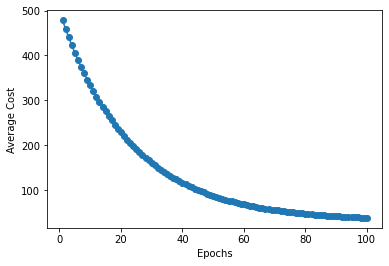

In [12]:
ada = AdalineGD(n_iter=100, eta=0.0001)
ada.fit(X_std,Y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()


[ 1.75042037 -0.06773132 -0.08301291 -0.1883755  -0.0380336  -0.12596046
  0.33535516  0.26489441]
[ 1.97822088 -0.05906401 -0.10554634 -0.14626535 -0.0950358  -0.11355822
  0.30804774  0.40737834]
[ 1.98750488 -0.0936485  -0.1626813  -0.18550833 -0.17332484 -0.15480342
  0.3245257   0.51205037]
[ 1.99483127 -0.08067325 -0.18197037 -0.10887046 -0.23607847 -0.12546638
  0.27163105  0.59489337]
[ 1.98054147 -0.08783394 -0.21582282 -0.08577707 -0.30508006 -0.1245303
  0.28256228  0.66551822]
[ 2.0283238  -0.10886823 -0.25891281 -0.10428774 -0.37494165 -0.14668541
  0.28113233  0.71922995]
[ 2.02303034 -0.09624091 -0.27120924 -0.07104924 -0.42287658 -0.12636177
  0.26709907  0.77510259]
[ 1.98761203 -0.09287862 -0.28483656 -0.10265972 -0.45612314 -0.129942
  0.27907036  0.8506304 ]
[ 1.99430976 -0.07751633 -0.28950654 -0.09637634 -0.48851814 -0.11188864
  0.26413395  0.9039045 ]
[ 1.99181322 -0.07977814 -0.31177556 -0.0950773  -0.53826395 -0.10950973
  0.26677958  0.93405413]
[ 2.00424242 

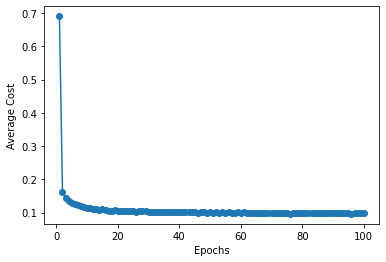

In [14]:
adaSGD = AdalineSGD(n_iter=100, eta=0.01, random_state=1)
adaSGD.fit(X_std, Y)
plt.plot(range(1, len(ada.cost_) + 1), adaSGD.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()